In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import warnings
from contextlib import contextmanager
import joblib


from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import cohen_kappa_score

# library options
%matplotlib inline
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

# Read in the Train and Test data

In [2]:
X_train = np.array(pd.read_parquet(r'C:\Users\lb199\rwth-aachen.de\Kai Blumberg - Advanced Topics in Marketing Analytics\data\final\X_train.parquet')).astype('float')
X_test = np.array(pd.read_parquet(r'C:\Users\lb199\rwth-aachen.de\Kai Blumberg - Advanced Topics in Marketing Analytics\data\final\X_test.parquet')).astype('float')

y_test_class = np.array(pd.read_parquet(r'C:\Users\lb199\rwth-aachen.de\Kai Blumberg - Advanced Topics in Marketing Analytics\data\final\y_test.parquet')['sum_payments_package_key_ltv_class'])
y_train_class = np.array(pd.read_parquet(r'C:\Users\lb199\rwth-aachen.de\Kai Blumberg - Advanced Topics in Marketing Analytics\data\final\y_train.parquet')['sum_payments_package_key_ltv_class'])                        
y_test_reg = np.array(pd.read_parquet(r'C:\Users\lb199\rwth-aachen.de\Kai Blumberg - Advanced Topics in Marketing Analytics\data\final\y_test.parquet')['sum_payments_package_key_ltv']).astype('float')
y_train_reg = np.array(pd.read_parquet(r'C:\Users\lb199\rwth-aachen.de\Kai Blumberg - Advanced Topics in Marketing Analytics\data\final\y_train.parquet')['sum_payments_package_key_ltv']).astype('float')
n_class = 3

# cross validation variable
cross_validation = True

# Classifier

In [3]:
logreg = LogisticRegression(random_state = 42)

# Train the model on training data
logreg.fit(X_train, y_train_class)

LogisticRegression(random_state=42)

In [4]:
y_pred_c = logreg.predict(X_test)

In [5]:
# Model Accuracy, how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test_class, y_pred_c))
print('MAE: %.3f (%.3f)' % (np.mean(y_pred_c), np.std(y_pred_c)))

Test Set Accuracy: 0.8246386145699156
MAE: 0.995 (0.748)


In [8]:
cohen_kappa = cohen_kappa_score(y_test_class,y_pred_c)
cohen_kappa

0.7325493010562052

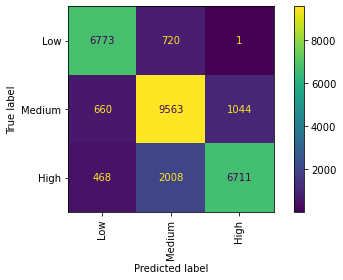

In [14]:
cm = confusion_matrix(y_test_class, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low','Medium','High'])
disp.plot()
plt.xticks(rotation=90)
plt.tight_layout()

## results after the 10-fold cross-validation

In [9]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_class, y_test_class), axis=0)

score = cross_val_score(estimator=logreg, X=inputs, y=targets, cv=10)
print(score)
print("The mean is " + str(score.mean()) + " with a standard deviation of " + str(score.std()))

[0.8268928  0.8315443  0.83147274 0.82760842 0.82717905 0.83039931
 0.82846715 0.83111493 0.82610562 0.82480498]
The mean is 0.8285589294760344 with a standard deviation of 0.002302729062227289


In [10]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_class, y_test_class), axis=0)

score = cross_val_score(estimator=logreg, X=inputs, y=targets, cv=10, scoring=make_scorer(cohen_kappa_score))
print(score)
print("The mean is " + str(score.mean()) + " with a standard deviation of " + str(score.std()))

[0.73627614 0.74339153 0.74310236 0.73732961 0.73659908 0.74175428
 0.7387557  0.74264802 0.73512246 0.73305588]
The mean is 0.7388035048101923 with a standard deviation of 0.0035074863088816544


In [12]:
 print(classification_report(y_test_class, logreg.predict(X_test), target_names=['Low','Medium','High']))

              precision    recall  f1-score   support

         Low       0.86      0.90      0.88      7494
      Medium       0.78      0.85      0.81     11267
        High       0.87      0.73      0.79      9187

    accuracy                           0.82     27948
   macro avg       0.83      0.83      0.83     27948
weighted avg       0.83      0.82      0.82     27948

